In [87]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class space():
    def __init__(self, dim_x: int, dim_y: int):
        """
        Constructor class 
        :param dim_x: x dimension of the space
        :param dim_y: y dimension of the space
        """
        
        self.dim_x, self.dim_y = dim_x, dim_y
        self.x, self.y = np.arange(dim_x), np.arange(dim_y)
        self.X, self.Y = np.meshgrid(self.x, self.y)
        self.potential = np.zeros((self.X.shape))
        
    
    def setGoal(self, x: int, y: int):
        """
        set the space "goal" position
        :param x:  x coordinate
        :param y:  y coordinate
        """
        self.xg, self.yg = x, y
        
    def invDistance(self, x: int, y: int):
        """
        To a valid posicion, return 1/goal distance. To a position equal
        to the goal position, return 2. To a invalid posicion (obstacles),
        return -1
        
        :param x:  x coordinate
        :param y:  y coordinate
        """
        if self.potential[x][y] == 1:
            return -1
        if (x == self.xg) and (y == self.yg):
            return 2
        else:
            inv_d = 1/math.sqrt(math.pow((x-self.xg), 2) + math.pow((y-self.yg), 2))
            return inv_d

    # r² = (x - xo)² + (y-y0)² 
    def setCircularObject(self, x0: int, y0: int, r: float, p: float):
        """
        set a object in potential space. If the object is the goal, 
        a negative potential is idicate. If the object is a obstacle, 
        the potential must be 1. 
        :param x0:  x coordinate of the object center
        :param y0:  y coordinate of the object center
        :param r: radius of the object
        :param p: potential of the object
        """
    
        for i, linha in enumerate(self.potential): 
            for j, value in enumerate(linha): 
                if math.sqrt( math.pow((i-x0),2) + math.pow((j-y0),2)) <= r:
                    self.potential[i][j] = p
    
    
    def setCircularObstacle(self, x0: int, y0: int, r: float):
        """
        set a obstacle in potential space. The potential of a obstacle
        must be 1
        :param x0:  x coordinate of the obstacle center
        :param y0:  y coordinate of the obstacle center
        :param r: radius of the obstacle
        :param p: potential of the obstacle
        """
    
        self.setCircularObject(x0=x0, y0=y0, r=r, p=1)
    
    def setCircularGoal(self, x0: int, y0: int, r: float):
        """
        set a circular goal representation in potential space. The 
        potential of a obstacle must be 1
        :param x0:  x coordinate of the center
        :param y0:  y coordinate of the center
        :param r: radius of the goal representation
        :param p: potential of the representation
        """
    
        self.setCircularObject(x0=x0, y0=y0, r=r, p=-1)
                    

    def Sniff(self, i_max: int, x0: int, y0: int, step: int=1): 
        """
        Find the way to the goal.  
        :param x0:  x coordinate of the search start
        :param y0:  y coordinate of the search start
        :param step: search step
        :param i: maximum search iterations
        
        return two lists: 'x' with the x coordinates of the way and 
        'y' with the y coordinates.
        
        """
        
        x, y = [x0], [y0]
#       lt    t     rt 
#       l           r         
#       lb    b     rb
# 
#       [top, right-top, right, right-bottom, bottom, left-bottom, left, left-top]  
        dtype = [('x', int), ('y', int), ('inv-distance', float)]
        movements = np.zeros(8, dtype= dtype)
        for i in range(i_max): 
#             print(x)
#             print(y)
            if x[-1] == self.xg and y[-1] == self.yg:
                break
            
#           rigth  
            if x[-1]+ step < self.dim_x:
                movements[2][0] = x[-1] + step
                movements[2][1] = y[-1]
                movements[2][2] = self.invDistance(x=x[-1]+ step, y=y[-1])
                
#           left      
            if x[-1] > 0: 
                movements[6][0] = x[-1] - 1
                movements[6][1] = y[-1]
                movements[6][2] = self.invDistance(x=x[-1]-1, y=y[-1])
#           top      
            if y[-1] + step < self.dim_y: 
                movements[0][0] = x[-1]
                movements[0][1] = y[-1]+ step
                movements[0][2] = self.invDistance(x=x[-1], y=y[-1]+ step)
#           bottom      
            if y[-1] > 0: 
                movements[4][0] = x[-1]
                movements[4][1] = y[-1]-1
                movements[4][2] = self.invDistance(x=x[-1], y=y[-1]-1)
#           rigth-top
            if (x[-1] + step < self.dim_x) and (y[-1] + step < self.dim_y):
                movements[1][0] = x[-1] + step
                movements[1][1] = y[-1] + step
                movements[1][2] = self.invDistance(x=x[-1]+ step, y=y[-1]+ step)
#           rigth-bottom
            if (x[-1] + step < self.dim_x) and (y[-1] > 0):
                movements[3][0] = x[-1] + step
                movements[3][1] = y[-1] - 1
                movements[3][2] = self.invDistance(x=x[-1]+ step, y=y[-1]-1)                
#           left-top      
            if (x[-1] > 0) and (y[-1] + step < self.dim_y): 
                movements[7][0] = x[-1] - 1
                movements[7][1] = y[-1] + step
                movements[7][2] = self.invDistance(x=x[-1]-1, y=y[-1]+ step)
#           left-bottom     
            if (x[-1] > 0) and (y[-1] > 0): 
                movements[5][0] = x[-1] - 1
                movements[5][1] = y[-1] - 1
                movements[5][2] = self.invDistance(x=x[-1]-1, y=y[-1]-1)
            
#             print(movements)
            bm = np.sort(movements, order='inv-distance')[-1]
            x += [bm[0]]
            y += [bm[1]]
            
        print("iterations: ", i)
        
        return [x, y]



In [88]:
# Demonstration
tab = space(700, 700)

# goal
xg, yg = 600, 300
tab.setCircularGoal(x0=xg, y0=yg, r=20)
tab.setGoal(x=xg, y=yg)


# # obstacles
tab.setCircularObstacle(x0=300, y0=200, r=20)
tab.setCircularObstacle(x0=200, y0=200, r=20)
tab.setCircularObstacle(x0=100, y0=100, r=20)
tab.setCircularObstacle(x0=400, y0=100, r=20)
tab.setCircularObstacle(x0=300, y0=400, r=20)
tab.setCircularObstacle(x0=300, y0=300, r=20)
tab.setCircularObstacle(x0=400, y0=400, r=20)


# print(tab.potential)
x, y = tab.Sniff(i_max=1000, x0=0, y0=0, step=2)
print("Goal finded in: x=" + str(x[-1]) + " y=" + str(y[-1]))


iterations:  300
Goal finded in: x=600 y=300


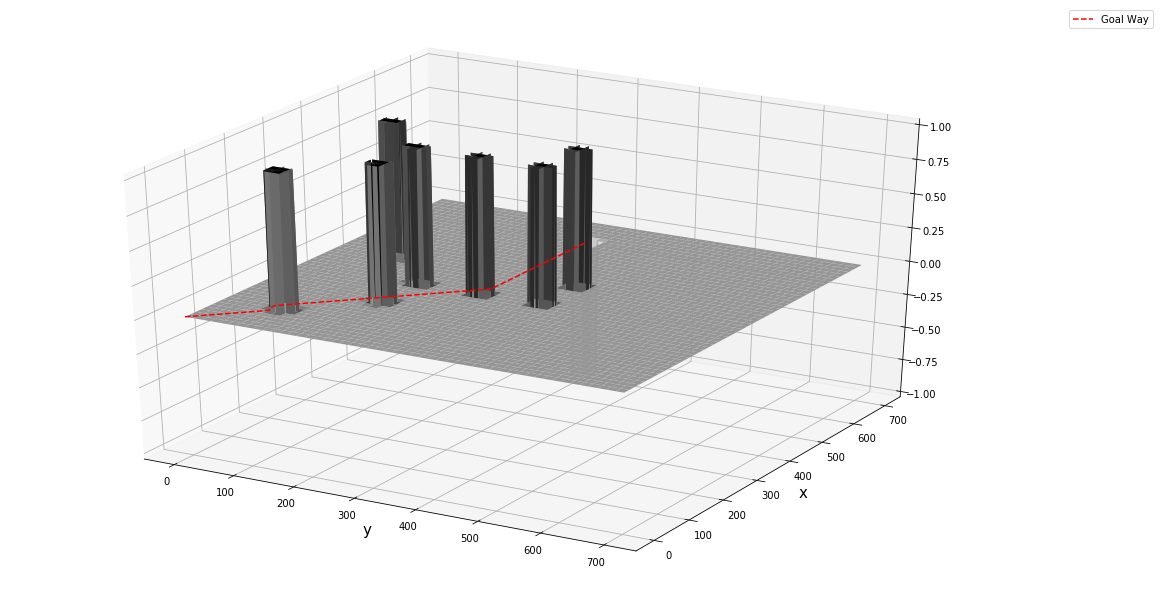

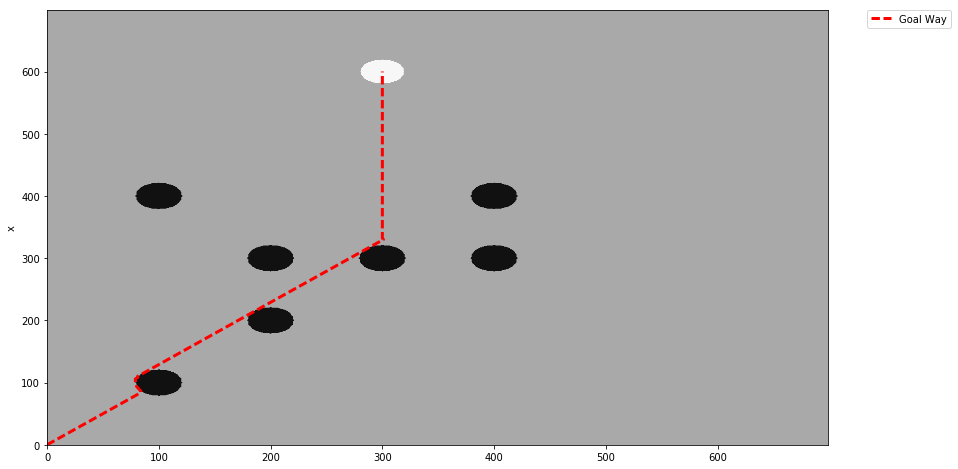

In [89]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# cm = plt.cm.YlOrRd
cm = plt.cm.Greys

fig = plt.figure(figsize=(14, 8))
ax = Axes3D(fig)
ax.plot_surface(tab.X, tab.Y, tab.potential, cmap=cm, alpha=1)
ax.plot(y, x, 0, 'r--', label="Goal Way")
ax.set_xlabel('y', fontsize=15)
ax.set_ylabel('x', fontsize=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)



fig = plt.figure(figsize=(14, 8))
ax = fig.add_subplot(111)
ax.contourf(tab.X, tab.Y, tab.potential, cmap=cm)
ax.plot(y, x, 'r--', linewidth=3 , label="Goal Way")
ax.set_label('y')
ax.set_ylabel('x')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
